__Import the libraries__

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

__Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection and write a helper function to plot the image using matplotlib.[Hint:Explore datasets module from scikit learn]__

In [3]:
from sklearn.datasets import load_digits

In [6]:
data = load_digits(as_frame=True)
data

{'data':       pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 0           0.0        0.0        5.0       13.0        9.0        1.0   
 1           0.0        0.0        0.0       12.0       13.0        5.0   
 2           0.0        0.0        0.0        4.0       15.0       12.0   
 3           0.0        0.0        7.0       15.0       13.0        1.0   
 4           0.0        0.0        0.0        1.0       11.0        0.0   
 ...         ...        ...        ...        ...        ...        ...   
 1792        0.0        0.0        4.0       10.0       13.0        6.0   
 1793        0.0        0.0        6.0       16.0       13.0       11.0   
 1794        0.0        0.0        1.0       11.0       15.0        1.0   
 1795        0.0        0.0        2.0       10.0        7.0        0.0   
 1796        0.0        0.0       10.0       14.0        8.0        1.0   
 
       pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 0        

In [7]:
type(data)

sklearn.utils.Bunch

__Convert to DataFrame__

In [9]:
df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [10]:
df.target.value_counts()

3.0    183
5.0    182
1.0    182
6.0    181
4.0    181
9.0    180
7.0    179
0.0    178
2.0    177
8.0    174
Name: target, dtype: int64

__Make a train -test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.__

__Split the dataset into train and test data__

In [11]:
X = df.drop('target',axis=1)
y = df.target

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

__Fit the model__

In [67]:
lg = LogisticRegression(multi_class='multinomial',solver='newton-cg')
lg.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

__Predict the model__

In [68]:
y_pred = lg.predict(X_test)

__Check for Accuracy__

In [69]:
accuracy_score(y_test,y_pred)

0.9722222222222222

__Principle Component Analysis__

__Standardize the Data__ <br>
PCA is effected by scale so you need to scale the features in your data before applying PCA. <br>
Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) <br>
which is a requirement for the optimal performance of many machine learning algorithms.<br>
If you want to see the negative effect not scaling your data can have, <br>
scikit-learn has a section on the effects of not standardizing your data.<br>

In [23]:
from sklearn.preprocessing import StandardScaler
X= StandardScaler().fit_transform(X)
X

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [48]:
pca= PCA(n_components=40)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

__Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.[Hint:Refer to decomposition module of scikit learn]__

__Checking for Variance Ratio__

In [49]:
np.cumsum(pca.explained_variance_ratio_*100)

array([12.0339161 , 21.5949705 , 30.03938539, 36.5377933 , 41.39794818,
       45.61206805, 49.55415085, 52.94353177, 55.94175279, 58.87375534,
       61.6555608 , 64.23261589, 66.50791921, 68.73509895, 70.90032838,
       72.81449498, 74.59004206, 76.22811133, 77.82457148, 79.31376266,
       80.66173217, 81.93366349, 83.09950071, 84.15714677, 85.13246197,
       86.07702024, 86.94003314, 87.77667457, 88.57436539, 89.32082605,
       90.0464054 , 90.73831351, 91.39221618, 92.03295621, 92.624224  ,
       93.19535682, 93.71897137, 94.20064829, 94.65423711, 95.07685746])

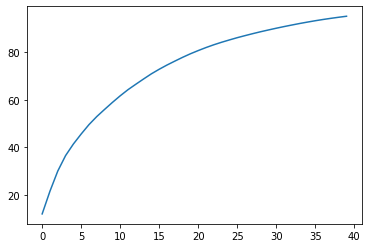

In [50]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))

__Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model andcomment on the accuracy.[Hint: Project both the train and test samples to the new subspace]__

In [47]:
principalDf

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.914213,-0.954500,-3.946036,2.028725,-0.267206,0.530358,-1.415320,1.496183,0.124974,-0.822052,...,0.451727,0.570911,0.499564,-0.764599,-0.484887,0.773730,0.203251,0.146928,0.513849,-0.202534
1,0.588980,0.924637,3.924755,-1.779848,-0.993407,-0.675682,1.878594,0.556288,1.079852,0.087291,...,0.911549,-0.247849,-0.482726,0.493283,0.847545,0.021646,-1.485255,-0.949466,-0.704412,-0.273300
2,1.302038,-0.317190,3.023332,-2.043380,-2.081242,0.935144,-1.296366,1.156530,0.785591,-1.098291,...,-0.532631,0.062390,-1.246053,-0.390472,-0.510468,-0.087827,0.332759,0.246547,-0.477511,1.236692
3,-3.020771,-0.868772,-0.801747,-2.187038,-0.556825,0.727098,0.959759,-1.382368,0.259088,0.744382,...,0.563303,-0.146881,0.554006,-0.549805,-0.083204,-0.437225,0.123289,-0.447469,0.408500,-1.188939
4,4.528951,-1.093482,0.973125,-1.419509,-1.715029,1.431603,1.073760,-0.968892,-1.660287,1.174214,...,0.493503,-0.202878,0.974166,-0.160491,0.589801,-2.205692,0.274384,0.934775,0.910697,0.119105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.104331,0.255023,-3.765859,-1.947010,-0.190140,-0.555761,0.531192,0.476504,1.152450,-0.472406,...,0.027607,-0.801556,-0.646226,-0.025616,-0.450622,-0.077614,0.280911,0.142169,0.857878,-0.071476
1793,2.423234,-1.429610,-3.045246,2.632089,-0.822900,0.004037,-1.106844,2.330957,0.569485,-1.654245,...,-0.955131,-0.037907,0.369984,0.077905,0.218580,-0.864443,0.313106,-0.565790,-0.807659,-0.090138
1794,1.022596,-0.147911,2.469972,-0.620309,-0.972091,-0.007306,0.381054,0.529174,2.054769,-2.036500,...,0.165142,-0.226684,0.048856,0.233369,-0.337707,-1.312373,-0.074030,-0.346112,0.644505,-0.116434
1795,1.076054,-0.380906,-2.455486,-1.312015,0.253472,-0.638350,1.034431,0.763572,1.077500,-0.333866,...,-0.134495,-0.440132,1.126688,0.324533,-1.002361,1.155239,-0.781716,0.874639,0.259705,-0.673600


In [51]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [52]:
finalDf

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,target
0,1.914214,-0.954501,-3.946035,2.028722,-0.267171,0.530327,-1.415322,1.496063,0.124920,-0.822257,...,-0.015448,0.045841,0.003970,0.096604,0.710338,0.093561,0.793483,0.021911,0.274166,0.0
1,0.588980,0.924636,3.924755,-1.779851,-0.993429,-0.675653,1.878563,0.556334,1.079875,0.087457,...,-1.144663,0.036969,0.368285,-0.673764,-0.009369,-0.246315,0.200532,0.088735,-0.499742,1.0
2,1.302039,-0.317189,3.023333,-2.043376,-2.081155,0.935118,-1.296203,1.156159,0.785600,-1.099196,...,0.486718,-1.356893,-0.108203,0.152755,-0.097473,0.405097,-0.207954,-1.284045,0.526689,2.0
3,-3.020770,-0.868772,-0.801744,-2.187039,-0.556813,0.727124,0.959767,-1.382638,0.259080,0.744541,...,0.876492,0.118092,-0.476431,-0.159886,0.237777,0.396023,0.184385,0.754441,-0.046026,3.0
4,4.528949,-1.093480,0.973121,-1.419510,-1.715106,1.431593,1.073651,-0.968238,-1.660209,1.174572,...,-0.358793,0.267483,0.495149,-0.272281,-0.576639,-0.169376,-0.227344,-0.138591,0.165501,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.104331,0.255024,-3.765861,-1.947007,-0.190094,-0.555757,0.531226,0.476477,1.152439,-0.473073,...,-0.514321,-0.310547,0.419152,0.386565,0.429463,0.541759,-0.034131,-0.772972,-0.289470,9.0
1793,2.423234,-1.429610,-3.045246,2.632088,-0.822901,0.004064,-1.106871,2.330907,0.569459,-1.654175,...,-0.131998,-0.192911,0.054814,-0.174636,-0.018866,-0.165310,-0.514534,-0.058396,-0.388974,0.0
1794,1.022596,-0.147911,2.469974,-0.620307,-0.972044,-0.007376,0.381115,0.529069,2.054708,-2.036842,...,-0.154974,0.053955,0.597864,1.022211,0.133252,-0.549766,0.599198,0.413584,1.197669,8.0
1795,1.076055,-0.380906,-2.455487,-1.312013,0.253532,-0.638322,1.034471,0.763325,1.077471,-0.334521,...,-0.448815,-0.465316,0.168200,-0.763003,0.577584,0.425551,0.450779,-0.703134,-0.420712,9.0


In [60]:
finalDf = finalDf.add_prefix('pca_')


In [62]:
finalDf.sample()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,pca_target
245,-2.583774,2.075346,1.881524,5.196811,0.659249,0.688011,0.577531,-1.767391,-1.903894,0.081934,...,-1.22665,0.509665,0.413952,0.462364,0.981808,0.34687,0.331798,-0.380406,0.128639,5.0


In [70]:
X_new = finalDf.drop('pca_target',axis=1)
y_new = finalDf.pca_target

In [71]:
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X_new,y_new,test_size=0.20,random_state=42)

In [72]:
lr = LogisticRegression(multi_class='multinomial',solver='newton-cg')
lr.fit(X_train_new,y_train_new)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [74]:
y_pred_new = lr.predict(X_test_new)
accuracy_score(y_test_new,y_pred_new)

0.9638888888888889

__Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample,plot the digit along with predicted and original label.__

In [80]:
x = confusion_matrix(y_test_new,y_pred_new)

In [76]:
df_cm = pd.DataFrame(confusion_matrix(y_test_new,y_pred_new))
df_cm

,0,1,2,3,4,5,6,7,8,9
0,33,0,0,0,0,0,0,0,0,0
1,0,27,1,0,0,0,0,0,0,0
2,0,0,32,0,0,0,0,0,1,0
3,0,0,0,33,0,1,0,0,0,0
4,0,0,0,0,46,0,0,0,0,0
5,0,0,0,0,0,44,1,0,0,2
6,0,0,0,0,0,1,34,0,0,0
7,0,0,0,0,0,1,0,33,0,0
8,0,1,0,0,0,1,0,0,28,0
9,0,0,0,1,0,0,0,0,2,37


In [77]:
from sklearn.metrics import plot_confusion_matrix

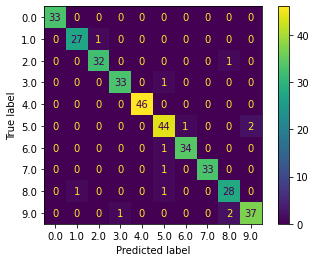

In [82]:
plot_confusion_matrix(lr,X_test_new,y_test_new)